In [0]:
import sklearn.datasets
import torch
import torch.nn as nn
import torch.nn.functional as Fs
#create a galaxy
x,y = sklearn.datasets.make_moons(400, noise=0.1)

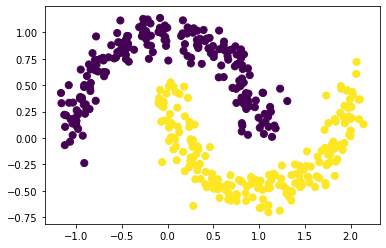

In [111]:
# plotting the data
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], s=50, c=y)

In [0]:
# convert data from numpy to tensors
x = torch.from_numpy(x).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

In [113]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super(BinaryClassifier, self).__init__()
    # defining the network layers
    self.fc1 = nn.Linear(2,3)
    self.fc2 = nn.Linear(3,2)
  #Implementing forward propagation
  def forward(self,x):
        #Output of the first layer
        x = self.fc1(x)
        #Activation function
        x = torch.sigmoid(x)
        #This produces output or the hypothesis ( Andrew easteregg )
        x = self.fc2(x)
        return x
        
    #This function takes an input and predicts the class, (0 or 1)        
  def predict(self,x):
        #Apply softmax to output. 
        pred = F.softmax(self.forward(x))
        ans = []
        #Pick the class with maximum weight
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)
net = BinaryClassifier()
print(net)

BinaryClassifier(
  (fc1): Linear(in_features=2, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=2, bias=True)
)


In [0]:
# cross entropy loss is the default used
criterion = nn.CrossEntropyLoss()
import torch.optim as optim
optimiser = optim.Adam(net.parameters(), lr=0.01) # adjust 1r (learning rate) for better results


In [0]:
#training the data:
epochs = 8000 # adjust so as not to over or under fit
losses = []
for i in range(epochs):
  y_pred = net.forward(x)
  loss = criterion(y_pred,y)
  losses.append(loss.item())
  optimiser.zero_grad()
  loss.backward() #calculate gradients
  optimiser.step() #adjust the weights

In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(net.predict(x),y))

1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


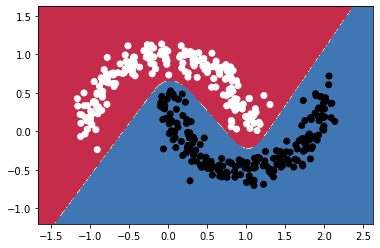

In [117]:
# copied for plotting 
import numpy as np
def predict(x):
 #Convert into numpy element to tensor
 x = torch.from_numpy(x).type(torch.FloatTensor)
 #Predict and return ans
 ans = net.predict(x)
 return ans.numpy()
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.binary)
plot_decision_boundary(lambda x : predict(x) ,x.numpy(), y.numpy())